In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/kaggle/input/dbm2project/player.txt', header=0)
print('Number of instances = %d' % df.shape[0])
print('Number of attributes = %d' % df.shape[1])
print('Number of missing values:')
for col in df.columns:
    print('\t%s: %d' % (col, df[col].isna().sum()))

df.head()


Number of instances = 735
Number of attributes = 32
Number of missing values:
	Rk: 0
	Player: 0
	Age: 0
	Team: 0
	Pos: 0
	G: 0
	GS: 0
	MP: 0
	FG: 0
	FGA: 0
	FG%: 8
	3P: 0
	3PA: 0
	3P%: 46
	2P: 0
	2PA: 0
	2P%: 13
	eFG%: 8
	FT: 0
	FTA: 0
	FT%: 59
	ORB: 0
	DRB: 0
	TRB: 0
	AST: 0
	STL: 0
	BLK: 0
	TOV: 0
	PF: 0
	PTS: 0
	Awards: 680
	Player-additional: 0


,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,Player-additional
0,1,Joel Embiid,29,PHI,C,39,39,33.6,11.5,21.8,...,8.6,11.0,5.6,1.2,1.7,3.8,2.9,34.7,AS,embiijo01
1,2,Luka Dončić,24,DAL,PG,70,70,37.5,11.5,23.6,...,8.4,9.2,9.8,1.4,0.5,4.0,2.1,33.9,MVP-3CPOY-6ASNBA1,doncilu01
2,3,Giannis Antetokounmpo,29,MIL,PF,73,73,35.2,11.5,18.8,...,8.8,11.5,6.5,1.2,1.1,3.4,2.9,30.4,MVP-4DPOY-9CPOY-12ASNBA1,antetgi01
3,4,Shai Gilgeous-Alexander,25,OKC,PG,75,75,34.0,10.6,19.8,...,4.7,5.5,6.2,2.0,0.9,2.2,2.5,30.1,MVP-2DPOY-7CPOY-3ASNBA1,gilgesh01
4,5,Jalen Brunson,27,NYK,PG,77,77,35.4,10.3,21.4,...,3.1,3.6,6.7,0.9,0.2,2.4,1.9,28.7,MVP-5CPOY-5ASNBA2,brunsja01


In [26]:
# replace the position of the player into number
df['Pos'] = df['Pos'].map({'PG': 1, 'SG': 2, 'SF': 3, 'PF': 4, 'C': 5})

# drop the no-need atrribute
new_df = df.drop(columns=['Player-additional','Awards','Rk','Player','Team'
                          ,'FG%','3P%','2P%','eFG%','FT%'
                         ])

# fill the Nan with 0
new_df.fillna(0, inplace=True)
filtered_df= new_df[(new_df['MP'] >= 3) & (new_df['G'] >= 5)]
# filtered_df= filtered_df.drop(columns = ['MP','G'])



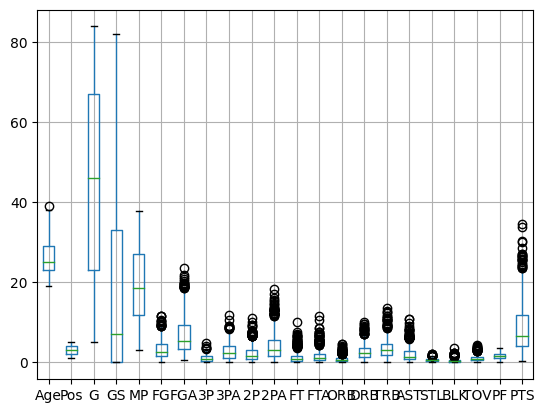

In [27]:
filtered_df.boxplot()
plt.show()

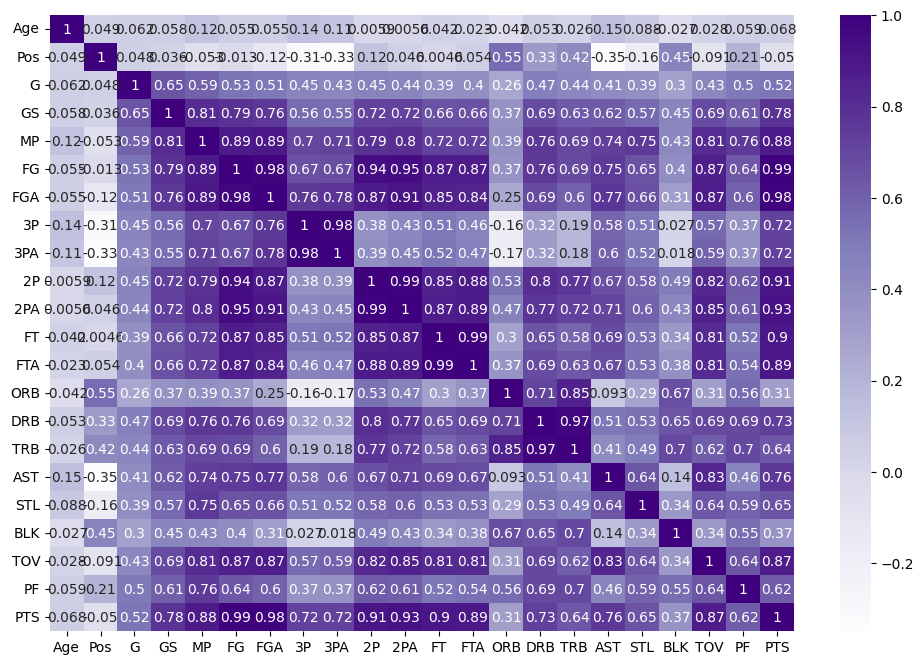

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(filtered_df.corr(),annot = True, cmap = 'Purples')
plt.show()

In [29]:
X = filtered_df.drop(columns=['Pos'])  
y = filtered_df['Pos'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Train set size: 533
Test set size: 134


In [30]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # training
    model.fit(X_train, y_train)
    
    # prediction
    y_test_pred = model.predict(X_test)
    
    # f1score
    val_f1_macro = f1_score(y_test, y_test_pred, average='macro')
    val_f1_micro = f1_score(y_test, y_test_pred, average='micro')
    val_f1_weighted = f1_score(y_test, y_test_pred, average='weighted')
    
    # output
    print(f"F1 Score (Macro): {val_f1_macro:.4f}")
    print(f"F1 Score (Micro): {val_f1_micro:.4f}")
    print(f"F1 Score (Weighted): {val_f1_weighted:.4f}")
    print('-' * 50)

In [31]:
# 1. ** DecisionTreeClassifier**
from sklearn.tree import DecisionTreeClassifier
print("Decision Tree Classifier:")
dt_model = DecisionTreeClassifier(random_state=42)
evaluate_model(dt_model, X_train, X_test, y_train, y_test)

# 2. **RandomForestClassifier**
from sklearn.ensemble import RandomForestClassifier
print("Random Forest Classifier:")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf_model, X_train, X_test, y_train, y_test)

# 3. **Support Vector Machine**
from sklearn.svm import SVC
print("Support Vector Machine (SVM):")
svm_model = SVC(random_state=42)
evaluate_model(svm_model, X_train, X_test, y_train, y_test)

# 4. ** LogisticRegression**
from sklearn.linear_model import LogisticRegression
print("Logistic Regression Classifier:")
lr_model = LogisticRegression(max_iter=200, random_state=42)
evaluate_model(lr_model, X_train, X_test, y_train, y_test)

# 5. **KNeighborsClassifier**
from sklearn.neighbors import KNeighborsClassifier
print("K-Nearest Neighbors (KNN):")
knn_model = KNeighborsClassifier()
evaluate_model(knn_model, X_train, X_test, y_train, y_test)

# 6. **GaussianNB**
from sklearn.naive_bayes import GaussianNB
print("Naive Bayes Classifier:")
nb_model = GaussianNB()
evaluate_model(nb_model, X_train, X_test, y_train, y_test)

# 7. **GradientBoostingClassifier**
from sklearn.ensemble import GradientBoostingClassifier
print("Gradient Boosting Classifier:")
gb_model = GradientBoostingClassifier(random_state=42)
evaluate_model(gb_model, X_train, X_test, y_train, y_test)


Decision Tree Classifier:
F1 Score (Macro): 0.4013
F1 Score (Micro): 0.4104
F1 Score (Weighted): 0.4031
--------------------------------------------------
Random Forest Classifier:
F1 Score (Macro): 0.5545
F1 Score (Micro): 0.5597
F1 Score (Weighted): 0.5520
--------------------------------------------------
Support Vector Machine (SVM):
F1 Score (Macro): 0.1459
F1 Score (Micro): 0.1791
F1 Score (Weighted): 0.1486
--------------------------------------------------
Logistic Regression Classifier:
F1 Score (Macro): 0.4768
F1 Score (Micro): 0.4851
F1 Score (Weighted): 0.4764
--------------------------------------------------
K-Nearest Neighbors (KNN):
F1 Score (Macro): 0.2270
F1 Score (Micro): 0.2388
F1 Score (Weighted): 0.2258
--------------------------------------------------
Naive Bayes Classifier:
F1 Score (Macro): 0.3104
F1 Score (Micro): 0.3134
F1 Score (Weighted): 0.3057
--------------------------------------------------
Gradient Boosting Classifier:


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 Score (Macro): 0.5049
F1 Score (Micro): 0.5075
F1 Score (Weighted): 0.5040
--------------------------------------------------
